In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('air_quality_daily.csv')


In [258]:
# check the head of the data
print(df.head())

# check the shape of the data
print(df.shape)

# check the data types of the columns
print(df.dtypes)

# check for missing values
print(df.isna().sum())

# summary statistics
print(df.describe())


     DateTime  CO(GT)  PT08.S4(NO2)  PT08.S5(O3)     AQI
0  2004-03-10    1.97       1545.50      1096.00  374.44
1  2004-03-11    2.17       1522.83       885.25  331.71
2  2004-03-12    2.74       1627.29      1084.38  350.82
3  2004-03-13    2.61       1595.79      1245.92  387.11
4  2004-03-14    2.40       1602.38      1234.21  369.97
(391, 5)
DateTime         object
CO(GT)          float64
PT08.S4(NO2)    float64
PT08.S5(O3)     float64
AQI             float64
dtype: object
DateTime        0
CO(GT)          0
PT08.S4(NO2)    0
PT08.S5(O3)     0
AQI             0
dtype: int64
           CO(GT)  PT08.S4(NO2)  PT08.S5(O3)         AQI
count  391.000000    391.000000   391.000000  391.000000
mean     2.095064   1457.600486  1026.110205  352.139744
std      0.719342    270.952912   274.195652   37.170593
min      0.610000    699.080000   380.040000  255.500000
25%      1.575000   1282.915000   825.895000  325.655000
50%      2.100000   1513.540000  1017.920000  356.740000
75%      2.54

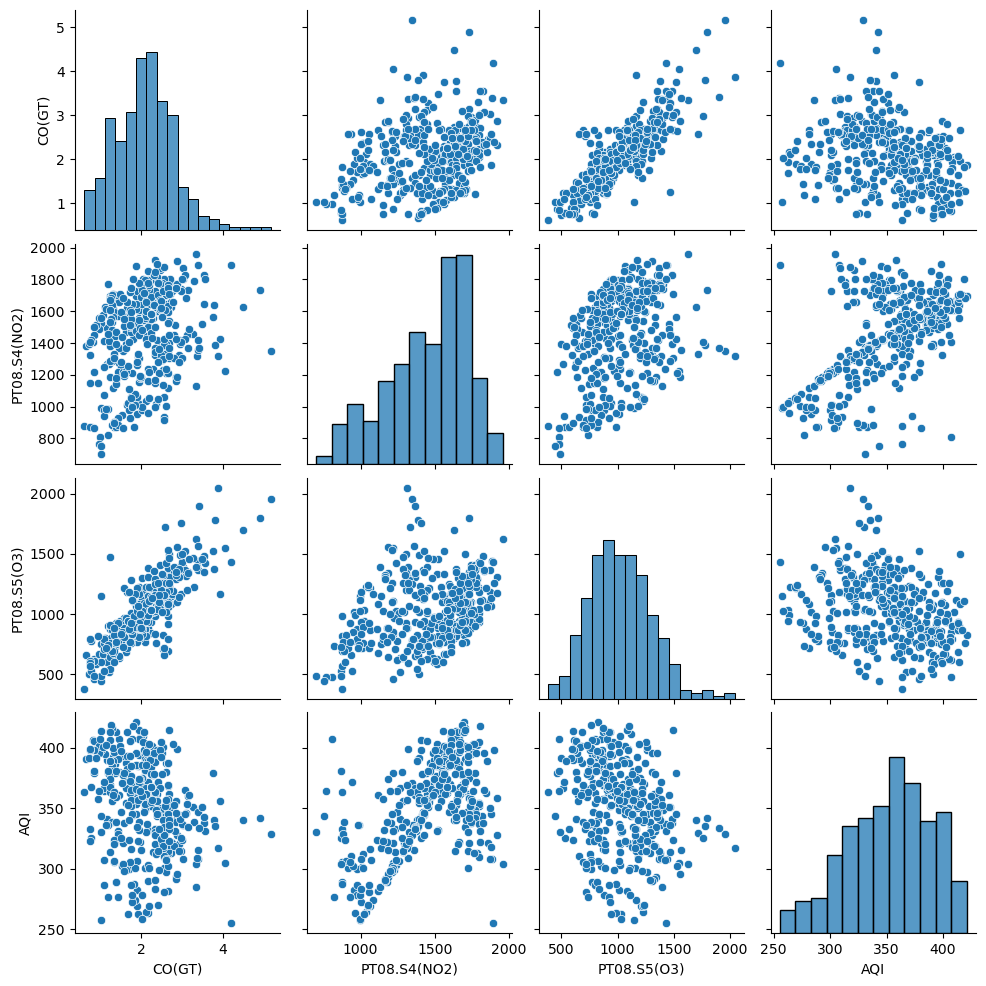

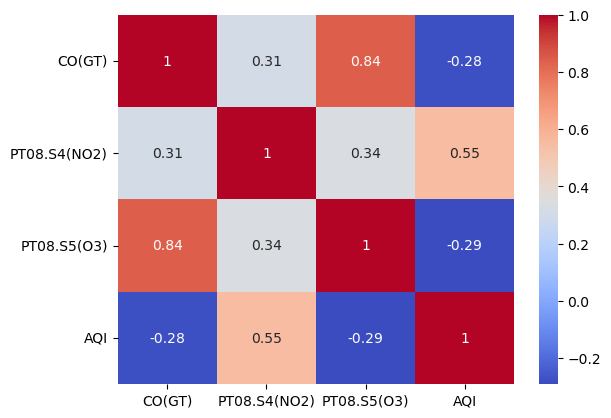

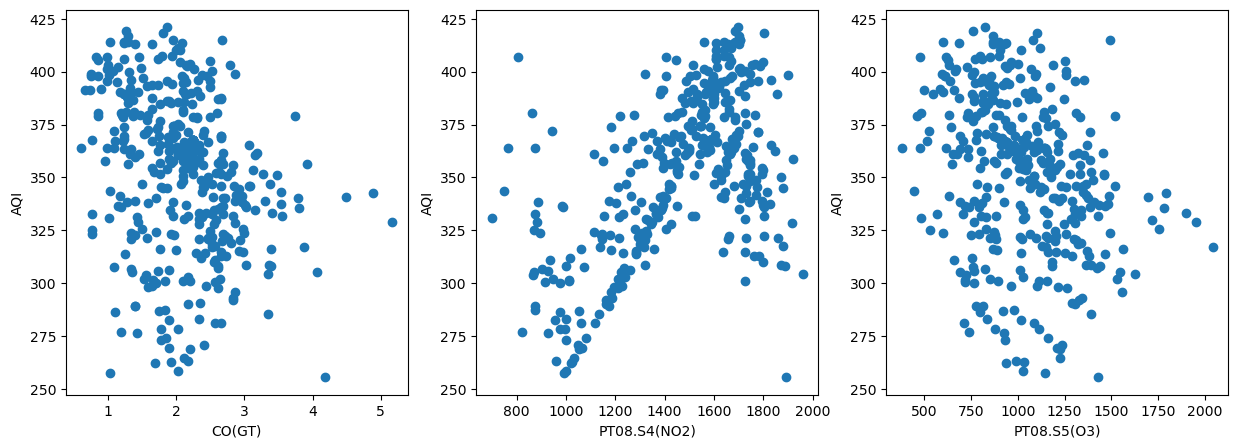

In [259]:
# pairplot
sns.pairplot(df)
plt.show()

# heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# scatterplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df['CO(GT)'], df['AQI'])
axs[0].set_xlabel('CO(GT)')
axs[0].set_ylabel('AQI')
axs[1].scatter(df['PT08.S4(NO2)'], df['AQI'])
axs[1].set_xlabel('PT08.S4(NO2)')
axs[1].set_ylabel('AQI')
axs[2].scatter(df['PT08.S5(O3)'], df['AQI'])
axs[2].set_xlabel('PT08.S5(O3)')
axs[2].set_ylabel('AQI')
plt.show()


In [264]:
# separate the target variable and the features
X = data.drop(['DateTime', 'AQI'], axis=1)
y = data['AQI']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [265]:
# create a linear regression object
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

R^2 Score:  0.5347954245270472
Mean Squared Error:  582.48583866835


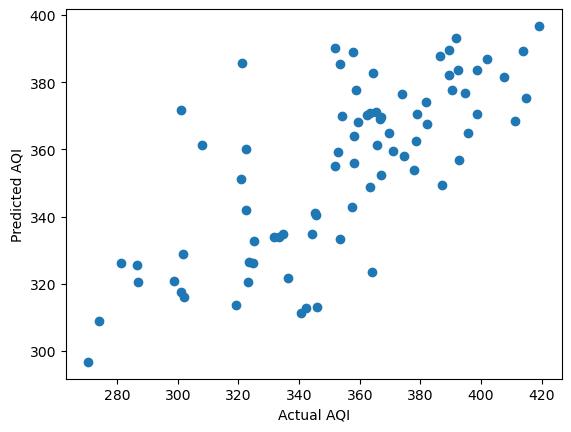

In [266]:
# make predictions on the test data
y_pred = model.predict(X_test)

# calculate R-squared score and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# print the results
print("R^2 Score: ", r2)
print("Mean Squared Error: ", mse)

# scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()


In [268]:
# Train a Ridge regression model with alpha=0.5
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

# Predict on the testing set
y_pred = ridge.predict(X_test)

# Evaluate the model
r2_ridge = r2_score(y_test, y_pred)
mse_ridge = mean_squared_error(y_test, y_pred)

print("Ridge Regression Results:")
print("R^2 Score: ", r2_ridge)
print("Mean Squared Error: ", mse_ridge)


Ridge Regression Results:
R^2 Score:  0.5347349097967109
Mean Squared Error:  582.561609577129


In [272]:
# Train a Lasso regression model with alpha=0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on the testing set
y_pred = lasso.predict(X_test)

# Evaluate the model
r2_lasso = r2_score(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)

print("Lasso Regression Results:")
print("R^2 Score: ", r2_lasso)
print("Mean Squared Error: ", mse_lasso)


Lasso Regression Results:
R^2 Score:  0.5343023560463184
Mean Squared Error:  583.1032130938407
